In [ ]:
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.5.1 box2d box2d-kengz



Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [ ]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from google.colab import files


In [ ]:

class DQNAgent:
  def __init__(self, environment):
    self.env = environment
    #training model
    self.model = self.start_model()
    self.targetmodel = self.start_model()
    self.epsilon = 1.0
    self.epsilon_decay = 0.995
    self.alpha = .0005
    self.gamma = 0.99
    self.memorySize = 10000
    self.layerNodes = 32
    self.batch_size = 64
    #target model
    self.target_model = self.start_model()
    self.replay = deque(maxlen = self.memorySize)
    self.stepcount = 0

  def start_model(self):
    """create NN using keras"""

    model = Sequential()
    model.add(Dense(64, input_dim = self.env.observation_space.shape[0],activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(self.env.action_space.n))
    model.compile(loss="mean_squared_error",optimizer=Adam(lr=.0005))
    return model

  def update_replay(self, state, action, reward, new_state, done):
    """update the replay buffer"""
    self.replay.append([state, action, reward, new_state, done])

  def take_action(self, current_state):
    """take an action, greedy epsilon"""
    if np.random.random() < self.epsilon:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.model.predict(current_state)[0])


  def replay_memory(self):
    
    
    if len(self.replay) < self.batch_size:
      return
    batch = random.sample(self.replay, self.batch_size)
    batch_states = []
    batch_forecasts = []
    for state, action, reward, next_state, done in batch:
      if done:
        target = reward
      elif not done:
        target = (reward+self.gamma * np.amax(self.targetmodel.predict(next_state)[0]))
      target_f = self.model.predict(state)
      
      target_f[0][action] = target
      
      batch_states.append(state[0])
      batch_forecasts.append(target_f[0])
    batch_states = np.array(batch_states)
    batch_forecasts = np.array(batch_forecasts)
    self.model.fit(batch_states, batch_forecasts, epochs=1, verbose=0)
    self.stepcount = (self.stepcount+1)%5
    if self.stepcount == 0:
      target_weights = np.array(self.targetmodel.get_weights())
      current_weights = np.array(self.model.get_weights())
      target_weights = current_weights
      self.targetmodel.set_weights(target_weights)
  
  #def replay_memory(self):
    
   # self.stepcount = (self.stepcount+1)%4
    #if self.stepcount == 0:
     # if len(self.replay) < self.batch_size:
      #  return
      #batch = random.sample(self.replay, self.batch_size)
      #batch_states = []
    #  batch_forecasts = []
     # batch_np = np.array(batch)
      
      #predictrewards = self.targetmodel.predict(np.vstack(batch_np[:,3]))
      
      #target_vector = np.where(batch_np[:,4]==False,np.multiply(self.gamma,np.amax(predictrewards,axis=1))+batch_np[:,2],batch_np[:,2])
      #forecast_target = self.model.predict(np.vstack(batch_np[:,0]))
      #print("fore target")
      #print(forecast_target)
      #actions = np.array(batch_np[:,1], dtype=int)
      #print("vector actions")
      #print(actions)
     # forecast_target[range(self.batch_size),actions[:]]
      
      #print("vector")
      #print(target_vector)
      #for state, action, reward, next_state, done in batch:
      #  if done:
      #    target = reward
      #  elif not done:
      #    target = (reward+self.gamma * np.amax(self.targetmodel.predict(next_state)[0]))
          #print(np.amax(self.targetmodel.predict(next_state)[0]))
          #print("gamma")
          #print(self.gamma)
          #print("loop")
          #print(target)
          
        
      #  target_f = self.model.predict(state)
        #print(target_f)
      #  target_f[0][action] = target
        
      #  batch_states.append(state[0])
      #  batch_forecasts.append(target_f[0])
      
      
      #batch_states = np.array(batch_states)
      
      
      #batch_forecasts = np.array(batch_forecasts)
      
     # self.model.fit(np.vstack(batch_np[:,0]), forecast_target, epochs=1, verbose=0)
      
      #target_weights = np.array(self.targetmodel.get_weights())
      #current_weights = np.array(self.model.get_weights())
      #target_weights = (current_weights * .001) + (.999 * target_weights)
      #self.targetmodel.set_weights(target_weights)

      #target_weights = self.targetmodel.get_weights()
      #current_weights = self.model.get_weights()
      #for weight_num in range(len(target_weights)):
      #  target_weights[weight_num] = .001* current_weights[weight_num] + (1-.001) * target_weights[weight_num]
      #self.targetmodel.set_weights(target_weights)

    
      



In [ ]:
def plotchart(xval,yval,xlabel,ylabel,title,filename):
  plt.plot(xval,yval)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.title(title)
  plt.savefig(filename)

  #files.download(filename)
  plt.show()
  plt.close()

environment = gym.make('LunarLander-v2')
environment = environment.unwrapped



environment.reset()
agent = DQNAgent(environment = environment)

episode: 0/1000, score: -428.2217391254436, e: 1.0


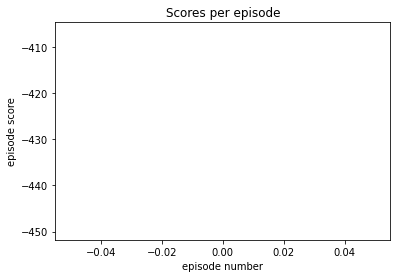

episode: 1/1000, score: -92.06658804017124, e: 0.99
episode: 2/1000, score: -68.54409261414122, e: 0.98
episode: 3/1000, score: -172.7337923297626, e: 0.97
episode: 4/1000, score: -105.720501376149, e: 0.96
episode: 5/1000, score: -174.02803074172886, e: 0.95
episode: 6/1000, score: -159.71686594247, e: 0.94
episode: 7/1000, score: -94.50270825087829, e: 0.93
episode: 8/1000, score: -116.87255008816044, e: 0.92
episode: 9/1000, score: -398.2129544238347, e: 0.91
episode: 10/1000, score: -264.2706103310328, e: 0.9
episode: 11/1000, score: -251.31366150767914, e: 0.9
episode: 12/1000, score: -198.31206464498712, e: 0.89
episode: 13/1000, score: -162.47585155210078, e: 0.88
episode: 14/1000, score: -299.68262465988687, e: 0.87
episode: 15/1000, score: -77.80863920073404, e: 0.86
episode: 16/1000, score: -343.43231496016506, e: 0.85
episode: 17/1000, score: -265.1865471538355, e: 0.84
episode: 18/1000, score: -397.31073974142623, e: 0.83
episode: 19/1000, score: -21.663509357873778, e: 0.8

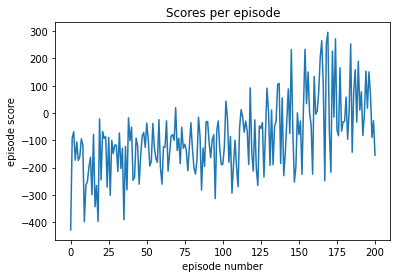

episode: 203/1000, score: -147.15458735979408, e: 0.13
episode: 211/1000, score: 199.44175090187613, e: 0.12
episode: 218/1000, score: 290.4580142525853, e: 0.11
episode: 219/1000, score: 217.4605901248494, e: 0.11
rolling average
-3.9351791301321923
episode: 221/1000, score: 151.80851693584898, e: 0.11
episode: 222/1000, score: -248.4280272265304, e: 0.11
episode: 224/1000, score: 126.40795923095817, e: 0.11
episode: 225/1000, score: 112.06781659771494, e: 0.1
episode: 227/1000, score: -83.95418253212453, e: 0.1
episode: 228/1000, score: 96.48012512565646, e: 0.1
episode: 231/1000, score: 186.9359591074251, e: 0.098
episode: 232/1000, score: -133.8602009477791, e: 0.097
episode: 233/1000, score: 15.887653450423784, e: 0.096
episode: 234/1000, score: -117.44711105607483, e: 0.095
episode: 236/1000, score: -88.2571622920438, e: 0.093
episode: 237/1000, score: -74.33530192848805, e: 0.092
episode: 239/1000, score: -117.2642448412622, e: 0.091
rolling average
6.2917038704861925
episode: 2

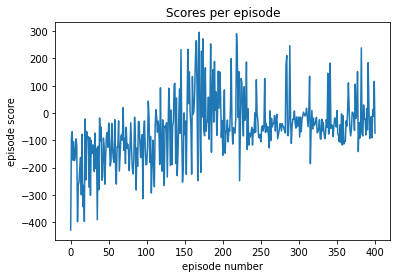

episode: 402/1000, score: 171.02979066307964, e: 0.018
episode: 403/1000, score: 179.54509820108206, e: 0.017
episode: 405/1000, score: -205.1086801989038, e: 0.017
episode: 409/1000, score: 128.2679952458101, e: 0.016
episode: 410/1000, score: -33.79808181948964, e: 0.016
episode: 412/1000, score: -136.3312459419167, e: 0.016
episode: 414/1000, score: -43.92638348498423, e: 0.016
episode: 415/1000, score: 157.30581979172558, e: 0.015
episode: 417/1000, score: -66.27925761303406, e: 0.015
rolling average
-24.69169739191261
episode: 422/1000, score: 217.26748197152034, e: 0.014
episode: 430/1000, score: 69.24089758511064, e: 0.013
episode: 431/1000, score: 180.94256569895572, e: 0.013
episode: 438/1000, score: -73.26502025134835, e: 0.012
episode: 439/1000, score: -3.2158985232998134, e: 0.012
rolling average
-13.794183459968899
episode: 446/1000, score: 194.6075878158074, e: 0.011
episode: 447/1000, score: 194.26901677932102, e: 0.011
episode: 450/1000, score: 229.21501482543215, e: 0.

In [ ]:

done = False
scores = []
for e in range(3000):
  
  state = environment.reset()
  state = np.reshape(state,[1,8])
  episode_score = 0
  for time in range(1000):
    # if e>400:
    #   environment.render()
    action = agent.take_action(state)
    next_state, reward, done, _ = environment.step(action)
    episode_score += reward
    next_state = np.reshape(next_state, [1, 8])
    agent.update_replay(state,action,reward,next_state,done)
    agent.replay_memory()
    #agent.replay_vectorized()
    #if reward == 100:
    #  print("winner")
    state = next_state
    if done:
      print("episode: {}/1000, score: {}, e: {:.2}".format(e,episode_score,agent.epsilon))
      break
  scores.append(episode_score)
  if e>=99:
    if e%20 == 0:
      #plotchart(np.arange(len(scores)),scores,"episode number","episode score","Scores per episode","trainingscoresperepisode.png")
      print("rolling average")
      print(np.mean(np.array(scores)[e-99:e]))
    if np.mean(np.array(scores)[e-99:e])>=200:
      agent.model.save("model.h5")
      plotchart(np.arange(len(scores)),scores,"episode number","episode score","Scores per episode, epsilon decay .999","trainingscoresperepisode"+str(e)+".png")
      break
  
  
  if e%200 == 0:
    plotchart(np.arange(len(scores)),scores,"episode number","episode score","Scores per episode","trainingscoresperepisode"+str(e)+".png")
  if agent.epsilon>.01:
    agent.epsilon *= agent.epsilon_decay

  

environment.close()